# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Internship/Cognifyz /Dataset .csv')

# Data Analysis

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Pre-Processing

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.dropna(subset=['Cuisines'], inplace=True)

In [9]:
data['Cuisines'].value_counts().unique()

array([936, 511, 354, 334, 299, 218, 197, 170, 149, 131, 118, 116, 112,
       108, 105, 103,  83,  74,  71,  70,  68,  65,  63,  62,  60,  56,
        54,  53,  51,  49,  46,  44,  43,  42,  41,  36,  35,  34,  31,
        28,  26,  24,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [10]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
  data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [12]:
unwanted_columns = ['Restaurant ID', 'Country Code', 'Address', 'Locality', 'Longitude', 'Latitude', 'Currency', 'Is delivering now', 'Switch to order menu', 'Rating color']
data = data.drop(unwanted_columns, axis=1)

In [13]:
data.head(2)

,Restaurant Name,City,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Yes,No,3,4.8,Excellent,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Yes,No,3,4.5,Excellent,591


In [14]:

new_column_names = {
    'Restaurant ID': 'restaurant_id',
    'Restaurant Name': 'restaurant_name',
    'City': 'city',
    'Longitude': 'longitude',
    'Latitude': 'latitude',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'average_cost_for_two',
    'Price range': 'price_range',
    'Aggregate rating': 'aggregate_rating',
    'Votes': 'votes'
}
data.rename(columns=new_column_names, inplace=True)

# Adjust the column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

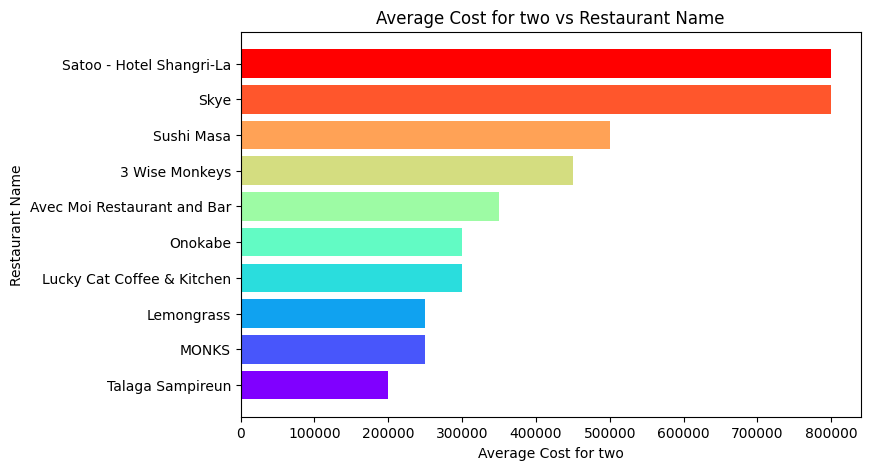

In [16]:
data_sorted = data.sort_values(by='average_cost_for_two')
# Get the top 10 and least 10
top_10 = data_sorted.tail(10)
# Create a figure
plt.figure(figsize=(8,5))

# Generate a color map
colors_top = cm.rainbow(np.linspace(0, 1, len(top_10)))

# Plot for top 10
plt.barh(top_10['restaurant_name'], top_10['average_cost_for_two'], color=colors_top)
plt.xlabel('Average Cost for two')
plt.ylabel('Restaurant Name')
plt.title('Average Cost for two vs Restaurant Name')

# Display the figure
plt.show()

In [17]:
data['cuisines'] = data['cuisines'].str.split(',').str[0].str.lower().str.replace(' ', '_')
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['cuisines'])

data['primary_cuisine'] = data['cuisines'].apply(lambda x: x.split()[0] if x else 'unknown')
y = data['primary_cuisine']

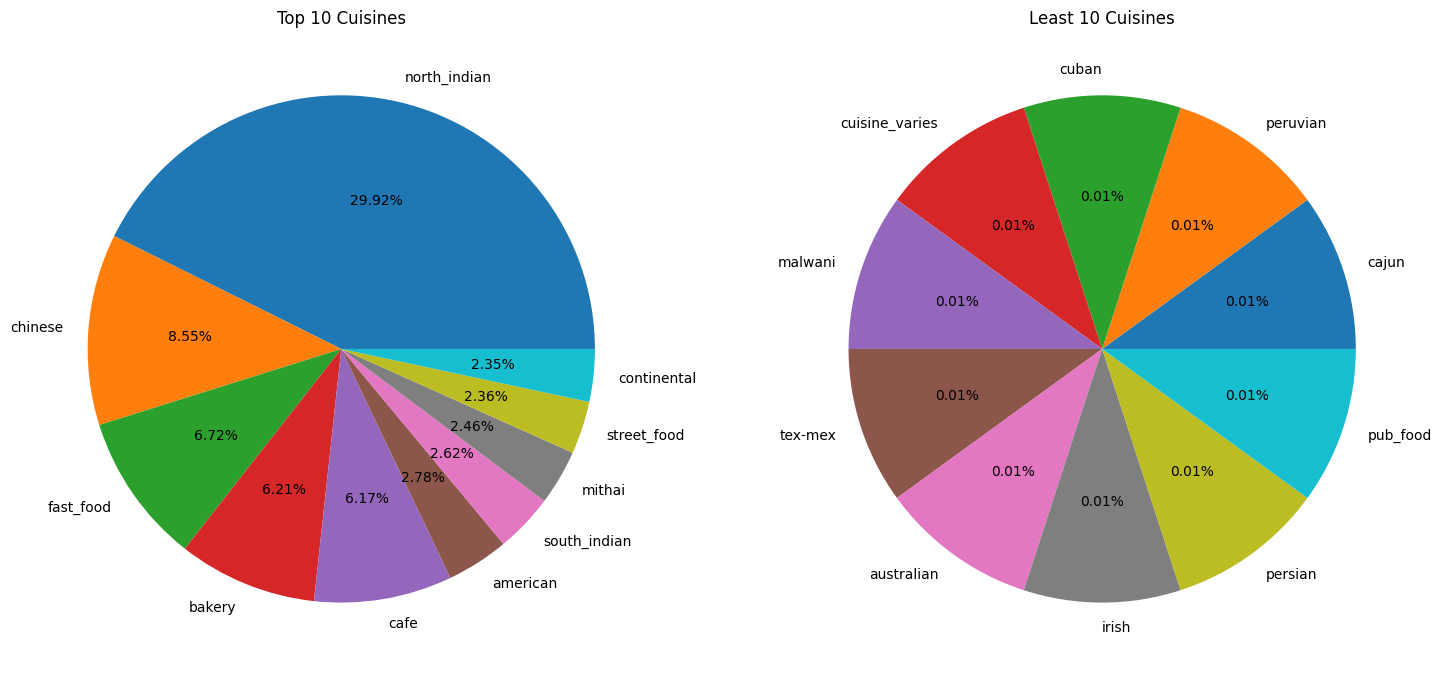

In [18]:
# Calculate the frequency of each cuisine
cuisine_counts = data['primary_cuisine'].value_counts()

# Get the top 10 and least 10 cuisines
top_10_cuisines = cuisine_counts.head(10)
least_10_cuisines = cuisine_counts.tail(10)

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Top 10 cuisines pie chart
axs[0].pie(top_10_cuisines, labels=top_10_cuisines.index, autopct=lambda p: '{:.2f}%'.format(p * sum(top_10_cuisines) / 10000))
axs[0].set_title('Top 10 Cuisines')

# Least 10 cuisines pie chart
axs[1].pie(least_10_cuisines, labels=least_10_cuisines.index, autopct=lambda p: '{:.2f}%'.format(p * sum(least_10_cuisines) / 10000))
axs[1].set_title('Least 10 Cuisines')

plt.show()

In [19]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [20]:
data.head(2)

,restaurant_name,city,locality_verbose,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_text,votes,primary_cuisine
0,3742,73,172,39,1100,1,0,3,4.8,1,314,39
1,3167,73,600,55,1200,1,0,3,4.5,1,591,55


# Data Splitting

In [21]:
X = data.drop('primary_cuisine', axis=1)
y = data['primary_cuisine']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# ML Models

In [23]:

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Predict on training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate training metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)

    # Calculate testing metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    print('--------------------------------------------->')
    print(f'Results for {model_name} Model')
    print('--------------------------------------------->')
    # Print metrics
    print("Training Accuracy:", train_accuracy)
    print("Training Precision:", train_precision)
    print("Training Recall:", train_recall)
    print("Training F1 Score:", train_f1)
    print('--------------------------------------------->')
    print("Testing Accuracy:", test_accuracy)
    print("Testing Precision:", test_precision)
    print("Testing Recall:", test_recall)
    print("Testing F1 Score:", test_f1)
    print('--------------------------------------------->')

    # Optional: Print classification report for testing data
    print("Classification Report for Testing Data:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print('--------------------------------------------->')


## AdaBost Classifier

In [24]:
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    learning_rate=0.9,
    random_state=42
)
adaboost.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, random_state=42)

### Model Evaluation Results

In [25]:
evaluate_model(adaboost, X_train, y_train, X_test, y_test, 'AdaBoost')

--------------------------------------------->
Results for AdaBoost Model
--------------------------------------------->
Training Accuracy: 0.9937115707098938
Training Precision: 0.9898518277172144
Training Recall: 0.9937115707098938
Training F1 Score: 0.9913420743740015
--------------------------------------------->
Testing Accuracy: 0.9911986588432523
Testing Precision: 0.9863272938293893
Testing Recall: 0.9911986588432523
Testing F1 Score: 0.9881565082026105
--------------------------------------------->
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00         1
          11       1.00      1.00      1.00       141
          12       1.00      1.00      1.00         6
          13  

## Logistic Regression

In [44]:
logreg = LogisticRegression(penalty='l2', max_iter=1100, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1100)

### Model Evaluation Results

In [45]:
evaluate_model(logreg, X_train, y_train, X_test, y_test, 'Logistic Regression')

--------------------------------------------->
Results for Logistic Regression Model
--------------------------------------------->
Training Accuracy: 0.4012017887087759
Training Precision: 0.25388765383403616
Training Recall: 0.4012017887087759
Training F1 Score: 0.2849319102309523
--------------------------------------------->
Testing Accuracy: 0.40737636211232187
Testing Precision: 0.2565964191462188
Testing Recall: 0.40737636211232187
Testing F1 Score: 0.2926586722904532
--------------------------------------------->
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.26      0.12      0.16        66
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00         1
          11       0.62      0.18      0.28       141
          12       0.00      0.00      0.00         6


## Decision Tree Classifier

In [28]:
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=40
)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3, random_state=40)

### Model Evaluation Results

In [29]:
evaluate_model(decision_tree, X_train, y_train, X_test, y_test, 'Decision Tree')

--------------------------------------------->
Results for Decision Tree Model
--------------------------------------------->
Training Accuracy: 0.9105645612073784
Training Precision: 0.8595809243065338
Training Recall: 0.9105645612073784
Training F1 Score: 0.8786715750699506
--------------------------------------------->
Testing Accuracy: 0.9103101424979044
Testing Precision: 0.8641656034154249
Testing Recall: 0.9103101424979044
Testing F1 Score: 0.8810338630797653
--------------------------------------------->
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.97      1.00      0.99        66
           3       0.00      0.00      0.00         1
           6       0.92      1.00      0.96        24
           7       0.00      0.00      0.00         1
          11       1.00      1.00      1.00       141
          12       1.00      1.00      1.00         6
         

## Voting Ensemble

In [30]:
voting_ensemble = VotingClassifier(
    estimators=[
        ('adaboost', adaboost),
        ('logreg', logreg),
        ('decision_tree', decision_tree)
    ],
    voting='hard'
)

# Train the VotingClassifier
voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('adaboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                 learning_rate=0.9,
                                                 random_state=42)),
                             ('logreg', LogisticRegression(max_iter=1000)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     random_state=40))])

### Model Evaluation Results

In [31]:
evaluate_model(voting_ensemble, X_train, y_train, X_test, y_test, 'Voting Ensemble')

--------------------------------------------->
Results for Voting Ensemble Model
--------------------------------------------->
Training Accuracy: 0.9550027948574623
Training Precision: 0.9318673940674953
Training Recall: 0.9550027948574623
Training F1 Score: 0.9383473407013325
--------------------------------------------->
Testing Accuracy: 0.9538977367979883
Testing Precision: 0.9326196883604638
Testing Recall: 0.9538977367979883
Testing F1 Score: 0.938423178492968
--------------------------------------------->
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       0.93      1.00      0.96        66
           3       1.00      1.00      1.00         1
           6       0.96      1.00      0.98        24
           7       0.00      0.00      0.00         1
          11       0.92      1.00      0.96       141
          12       1.00      1.00      1.00         6
        

# Accuracy Comparison Graph

In [32]:
def evaluate_models(model, X_train, y_train, X_test, y_test):
    # Predict on training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return train_accuracy, test_accuracy

# Evaluate models
models = {
    "AdaBoost": adaboost,
    "Logistic Regression": logreg,
    "Decision Tree": decision_tree,
    "Voting Ensemble": voting_ensemble
}

training_accuracies = []
testing_accuracies = []
model_names = []

for name, model in models.items():
    train_acc, test_acc = evaluate_models(model, X_train, y_train, X_test, y_test)
    training_accuracies.append(train_acc)
    testing_accuracies.append(test_acc)
    model_names.append(name)

<Figure size 2000x1000 with 0 Axes>

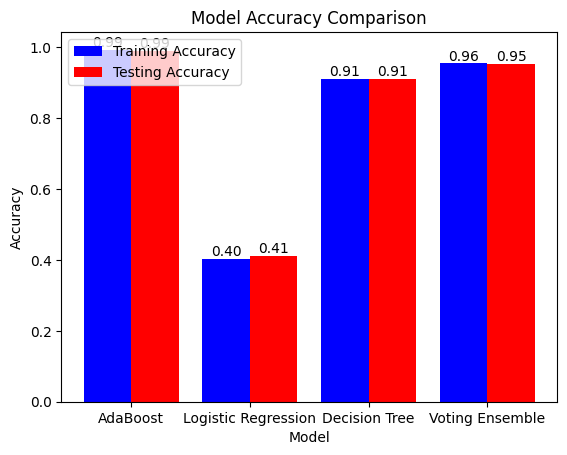

In [33]:
# Plotting the multi-bar graph
x = range(len(models))
width = 0.4

plt.figure(figsize=(20,10))

fig, ax = plt.subplots()
bar1 = ax.bar(x, training_accuracies, width, label='Training Accuracy', color='b', align='center')
bar2 = ax.bar([p + width for p in x], testing_accuracies, width, label='Testing Accuracy', color='r', align='center')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(model_names)
ax.legend()

# Adding the accuracy values on top of the bars
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()
